In [ ]:
import pandas as pd
import numpy as np
import glob
import imageio
import matplotlib.pyplot as plt
import sklearn
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = "/content/drive/MyDrive/defect-detection-using-cnn/defect-detection-using-cnn"

In [ ]:
pic = project_path + "/dataset/Defect_images/0003_002_00.png"

<ipython-input-6-9fef1f3359e7>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(pic)


picture shape: (256, 4096)
picture matrix: 
 [[255 255 255 ...  85  82  81]
 [255 255 255 ...  97  90  78]
 [255 255 255 ... 109 103  91]
 ...
 [255 255 255 ...  76  85  96]
 [255 255 255 ...  73  71  65]
 [255 255 255 ... 103 100  94]]


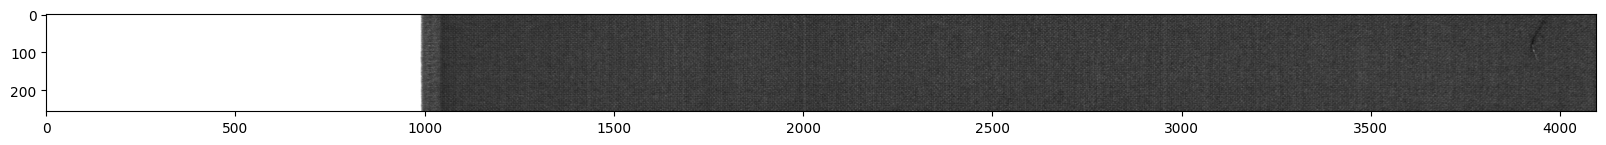

In [ ]:
im = imageio.imread(pic)
print("picture shape: {}".format(im.shape))
print("picture matrix: \n {}".format(im))
# set display size
plt.figure(figsize=(20,10))
plt.imshow(im, cmap='gray')
plt.show()

In [ ]:
def load_file(file_path, label):

    """
    TODO: load the file then create the dict object and append to list
    Return: numpyarray
    Description: object {
                  "name" : file name
                  "label" : label
                  "data" : image
                  }
    """

    # declare the folder name
    folder_name = file_path.split("/")[-1]
    # declare output list
    out_list = []
    # load every file that .png format
    for image_path in glob.glob(file_path + "/*.png"):
        # read image file
        image = imageio.imread(image_path)
        # declare temporary dict dtype
        temp = {}
        # set the file name
        temp["name"] = image_path.split("/")[-1]
        # set the file label, 0 for non defect. 1 for defect
        temp["label"] = label

        # There are somes images are tensor dtype
        # Thus I fix by selecting only a tensor index zero
        try:
            temp["data"] = image[:,:,0].astype("int")
        except:
            # normal case
            temp["data"] = image.astype("int")
        # append temp into output list
        out_list.append(temp)
    # print process status by checking size of output list
    if len(out_list) == 0:
        print("loading files from folder: {} is failed".format(folder_name))
    else:
        print("loading file from folder: {} is successful".format(folder_name))
    # convert list into numpy array dtype
    return np.array(out_list)

In [ ]:
defect_images_path = project_path + "/dataset/Defect_images"
non_defect_images_path1 =  project_path + "/dataset/NoDefect_images/2306881-210020u"
non_defect_images_path2 =  project_path + "/dataset/NoDefect_images/2306894-210033u"
non_defect_images_path3 =  project_path + "/dataset/NoDefect_images/2311517-195063u"
non_defect_images_path4 =  project_path + "/dataset/NoDefect_images/2311694-1930c7u"
non_defect_images_path5 =  project_path + "/dataset/NoDefect_images/2311694-2040n7u"
non_defect_images_path6 =  project_path + "/dataset/NoDefect_images/2311980-185026u"
non_defect_images_path7 =  project_path + "/dataset/NoDefect_images/2608691-202020u"
mask_images_path =  project_path + "/dataset/Mask_images"

In [ ]:
import os
print(os.listdir(project_path + "/dataset/Defect_images"))

['0082_030_04.png', '0004_002_01.png', '0027_019_02.png', '0056_019_06.png', '0093_030_01.png', '0096_030_03.png', '0017_002_02.png', '0021_016_03.png', '0006_002_01.png', '0038_019_02.png', '0079_025_03.png', '0100_025_08.png', '0064_022_00.png', '0002_002_00.png', '0059_019_01.png', '0078_025_03.png', '0068_023_02.png', '0092_030_01.png', '0045_019_04.png', '0063_022_00.png', '0015_006_02.png', '0039_019_02.png', '0044_019_04.png', '0058_019_06.png', '0051_019_03.png', '0029_019_02.png', '0106_010_03.png', '0050_019_03.png', '0049_030_03.png', '0085_030_02.png', '0060_022_06.png', '0072_010_03.png', '0076_030_03.png', '0047_019_04.png', '0054_019_03.png', '0095_010_03.png', '0067_023_01.png', '0080_036_01.png', '0048_019_04.png', '0016_006_02.png', '0098_019_02.png', '0062_022_00.png', '0104_022_03.png', '0109_025_03.png', '0013_006_02.png', '0088_030_02.png', '0035_019_02.png', '0075_010_03.png', '0042_019_02.png', '0071_030_03.png', '0033_019_02.png', '0053_019_03.png', '0010_006_0

In [ ]:
defect_images = load_file(file_path=defect_images_path, label=1)
non_defect_images1 = load_file(file_path=non_defect_images_path1, label=0)
non_defect_images2 = load_file(file_path=non_defect_images_path2, label=0)
non_defect_images3 = load_file(file_path=non_defect_images_path3, label=0)
non_defect_images4 = load_file(file_path=non_defect_images_path4, label=0)
non_defect_images5 = load_file(file_path=non_defect_images_path5, label=0)
non_defect_images6 = load_file(file_path=non_defect_images_path6, label=0)
non_defect_images7 = load_file(file_path=non_defect_images_path7, label=0)
mask_images = load_file(file_path=mask_images_path, label=-1)

<ipython-input-7-b5bcb78e5ada>:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


loading file from folder: Defect_images is successful
loading file from folder: 2306881-210020u is successful
loading file from folder: 2306894-210033u is successful
loading file from folder: 2311517-195063u is successful
loading file from folder: 2311694-1930c7u is successful
loading file from folder: 2311694-2040n7u is successful
loading file from folder: 2311980-185026u is successful
loading file from folder: 2608691-202020u is successful
loading file from folder: Mask_images is successful


In [ ]:
non_defect_images = np.concatenate((non_defect_images1, non_defect_images5))
non_defect_images = np.concatenate((non_defect_images1, non_defect_images6))

In [ ]:
print("defect_images.shape: {}\nnon_defect_images.shape: {}\nmask_images.shape:{} \n".
      format(defect_images.shape, non_defect_images.shape, mask_images.shape))

defect_images.shape: (105,)
non_defect_images.shape: (40,)
mask_images.shape:(107,) 



Data preparation

In [ ]:
np.random.shuffle(non_defect_images)
np.random.shuffle(defect_images)
# the class size is the min length compared with defect-free and defect images
class_size = defect_images.shape[0] if defect_images.shape[0] <= non_defect_images.shape[0] else non_defect_images.shape[0]
# declare dataset by concat defect_images and non_defect_images with length 0 to class_size
dataset = np.concatenate((defect_images[:class_size], non_defect_images[:class_size]))
# create an empty matrix X with is matrix of 256x4096 and has dataset length row
X = np.empty([dataset.shape[0], 256, 4096]).astype(int)
# create vector y which has dataset length
y = np.empty(dataset.shape[0]).astype(int)
# assign the X,y one-by-one
for i in range(dataset.shape[0]):
    X[i] = dataset[i]["data"]
    y[i] = dataset[i]["label"]
# since Keras acquire the Image input is a tensor type -> we reshape X
X = X.reshape(X.shape[0], 256, 4096, 1)
# display size of the label 0 and label 1
np.unique(y, return_counts=True)

(array([0, 1]), array([40, 40]))

In [ ]:
from tensorflow.keras import datasets, layers, models, optimizers, regularizers, callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def create_model(image_shape=(256, 4096, 1), print_summary=False):
    # initial model
    model = models.Sequential()

    # CONV layer: filter 16, stride 7x7
    model.add(layers.Conv2D(16, (7, 7),input_shape=image_shape))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(32, (5, 5), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    # flatten later -> from matrix to vector
    model.add(layers.Flatten())

    # fully connected layer -> nn layer with 64 nodes
    model.add(layers.Dense(64))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    # fully connected layer -> nn layer with 64 nodes
    model.add(layers.Dense(64))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer
    model.add(layers.Activation('relu'))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    # output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # set model compiler
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

    # show the CNN model detail
    if print_summary:
        model.summary()
    return model

def train_model(model, xtrain, ytrain, xval, yval, n_epoch, batch_size):
    # train CNN model
    # batch size to reduce memory usage
    # set early stopping to avoid overfitting

    earlystopping = EarlyStopping(monitor='val_accuracy', patience=2)
    filepath = project_path + "/model/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"

    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint, earlystopping]

    history = model.fit(xtrain, ytrain, epochs=n_epoch, batch_size=batch_size, validation_data=(xval, yval), callbacks=[callbacks_list])
    return history

create_model(image_shape=(256, 4096, 1), print_summary=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 4090, 16)     800       
                                                                 
 batch_normalization (Batch  (None, 250, 4090, 16)     64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 250, 4090, 16)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 2045, 16)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 125, 2045, 16)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 2045, 32)     1

In [ ]:

from sklearn.model_selection import StratifiedKFold

In [ ]:
# set number of split
kfold_splits = 4
# set number of epoch
n_epoch = 10
# set batch size
batch_size = 8

# create StratifiedKFold
skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True)
for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print("Training on fold {}/{}...".format(index+1, kfold_splits))

    # declare x train and x validate
    xtrain, xval = X[train_indices], X[val_indices]
    # declare y train and y validate
    ytrain, yval = y[train_indices], y[val_indices]

    # print number of class portion
    print("ytrain: number of samples each class: {}".format(np.unique(ytrain, return_counts=True)))
    print("yval: number of samples each class: {}".format(np.unique(yval, return_counts=True)))

    # clear the model
    model = None
    # create cnn model
    model = create_model()

    print("Training new iteration on {} training samples, {} validation samples, this may be a while...".format(xtrain.shape[0], xval.shape[0]))

    # train CNN model
    history = train_model(model, xtrain, ytrain, xval, yval, n_epoch, batch_size)

    print("--------------------------------------------------------------------")

Training on fold 1/4...
ytrain: number of samples each class: (array([0, 1]), array([30, 30]))
yval: number of samples each class: (array([0, 1]), array([10, 10]))
Training new iteration on 60 training samples, 20 validation samples, this may be a while...
Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 0.5191 - accuracy: 0.6833
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/defect-detection-using-cnn/defect-detection-using-cnn/model/weights-improvement-01-0.50.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 36s 2s/step - loss: 0.5191 - accuracy: 0.6833 - val_loss: 3.2311 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 0.3972 - accuracy: 0.8167
Epoch 2: val_accuracy did not improve from 0.50000
8/8 [==============================] - 4s 461ms/step - loss: 0.3972 - accuracy: 0.8167 - val_loss: 1.2021 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.2897 - accuracy: 0.9500
Epoch 3: val_accuracy did not improve from 0.50000
8/8 [==============================] - 4s 462ms/step - loss: 0.2897 - accuracy: 0.9500 - val_loss: 0.7237 - val_accuracy: 0.5000
--------------------------------------------------------------------
Training on fold 2/4...
ytrain: number of samples each class: (array([0, 1]), array([30, 30]))
yval: number of samples each class: (array([0, 1]), array([10, 10]))
Training new iteration on 60 training samples, 20 validation samples, this may be a while...
Epo

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("y_train: number of samples each class: {}".format(np.unique(y_train, return_counts=True)))
print("y_test: number of samples each class: {}".format(np.unique(y_test, return_counts=True)))

y_train: number of samples each class: (array([0, 1]), array([38, 30]))
y_test: number of samples each class: (array([0, 1]), array([ 2, 10]))


In [ ]:
cnn_model = None
cnn_model = create_model(image_shape=(256, 4096, 1))


earlystopping = EarlyStopping(monitor='val_accuracy', patience=2)
filepath = project_path + "/model/weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, earlystopping]

In [ ]:
cnn_model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/10
6/6 [==============================] - ETA: 0s - loss: 0.5723 - accuracy: 0.7407
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/defect-detection-using-cnn/defect-detection-using-cnn/model/weights_best.hdf5
6/6 [==============================] - 16s 2s/step - loss: 0.5723 - accuracy: 0.7407 - val_loss: 7.8296 - val_accuracy: 0.5714
Epoch 2/10
6/6 [==============================] - ETA: 0s - loss: 0.2654 - accuracy: 0.9444
Epoch 2: val_accuracy did not improve from 0.57143
6/6 [==============================] - 3s 538ms/step - loss: 0.2654 - accuracy: 0.9444 - val_loss: 2.6302 - val_accuracy: 0.5714
Epoch 3/10
6/6 [==============================] - ETA: 0s - loss: 0.2925 - accuracy: 0.8704
Epoch 3: val_accuracy did not improve from 0.57143
6/6 [==============================] - 3s 543ms/step - loss: 0.2925 - accuracy: 0.8704 - val_loss: 1.5656 - val_accuracy: 0.5714


In [ ]:
cnn_model1 = create_model()
cnn_model1.load_weights(project_path + "/model/weights_best.hdf5")
score, acc = cnn_model1.evaluate(X_test, y_test, verbose=0)
score,acc

(3.0430593490600586, 0.8333333134651184)

In [ ]:

from matplotlib import pyplot as plt
import matplotlib
import numpy as np

In [ ]:
def create_epoch(n=0):
    return np.arange(0, n)+1

In [ ]:
fold1_epoch = create_epoch(n=3)
fold1_loss = np.array([0.7588, 0.6020, 0.6368])
fold1_acc = np.array([0.5669, 0.6752, 0.6433])
fold1_val_loss = np.array([1.3923, 1.6198, 2.1095])
fold1_val_acc = np.array([0.5094, 0.5094, 0.5094])

fold2_epoch = create_epoch(n=3)
fold2_loss = np.array([0.7345, 0.6091, 0.6264])
fold2_acc = np.array([0.5796, 0.6879, 0.6369])
fold2_val_loss = np.array([0.9635, 0.6707, 0.9791])
fold2_val_acc = np.array([0.5472, 0.5283, 0.5472])

fold3_epoch = create_epoch(n=7)
fold3_loss = np.array([0.6917, 0.6561, 0.6595, 0.6109, 0.6304, 0.5891, 0.6354])
fold3_acc = np.array([0.5886, 0.5886, 0.6013, 0.6329, 0.6519, 0.6582, 0.6392])
fold3_val_loss = np.array([2.2545, 0.6790, 0.6571, 0.6806, 0.6349, 0.6671, 0.7047])
fold3_val_acc = np.array([0.5000, 0.5769, 0.5769, 0.6538, 0.7115, 0.6731, 0.4231])

fold4_epoch = create_epoch(n=6)
fold4_loss = np.array([0.7423, 0.6179, 0.5368, 0.5812, 0.5289, 0.5328])
fold4_acc = np.array([0.5696, 0.6709, 0.7025, 0.6772, 0.7215, 0.7722])
fold4_val_loss = np.array([3.2483, 1.0000, 0.7121, 0.6672, 0.6383, 0.8992])
fold4_val_acc = np.array([0.5000, 0.5000, 0.5192, 0.5769, 0.5769, 0.5000])

In [ ]:
# Calculate validtion average
(0.5094 + 0.5472 + 0.7115 + 0.5769)/4, (1.6198+ .9791 + 0.6349 + 0.6383)/4

(0.5862499999999999, 0.968025)

In [ ]:
# matplotlib font config
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

Text(0.5, 0.98, 'Validation Loss and Training Loss of Our Model')

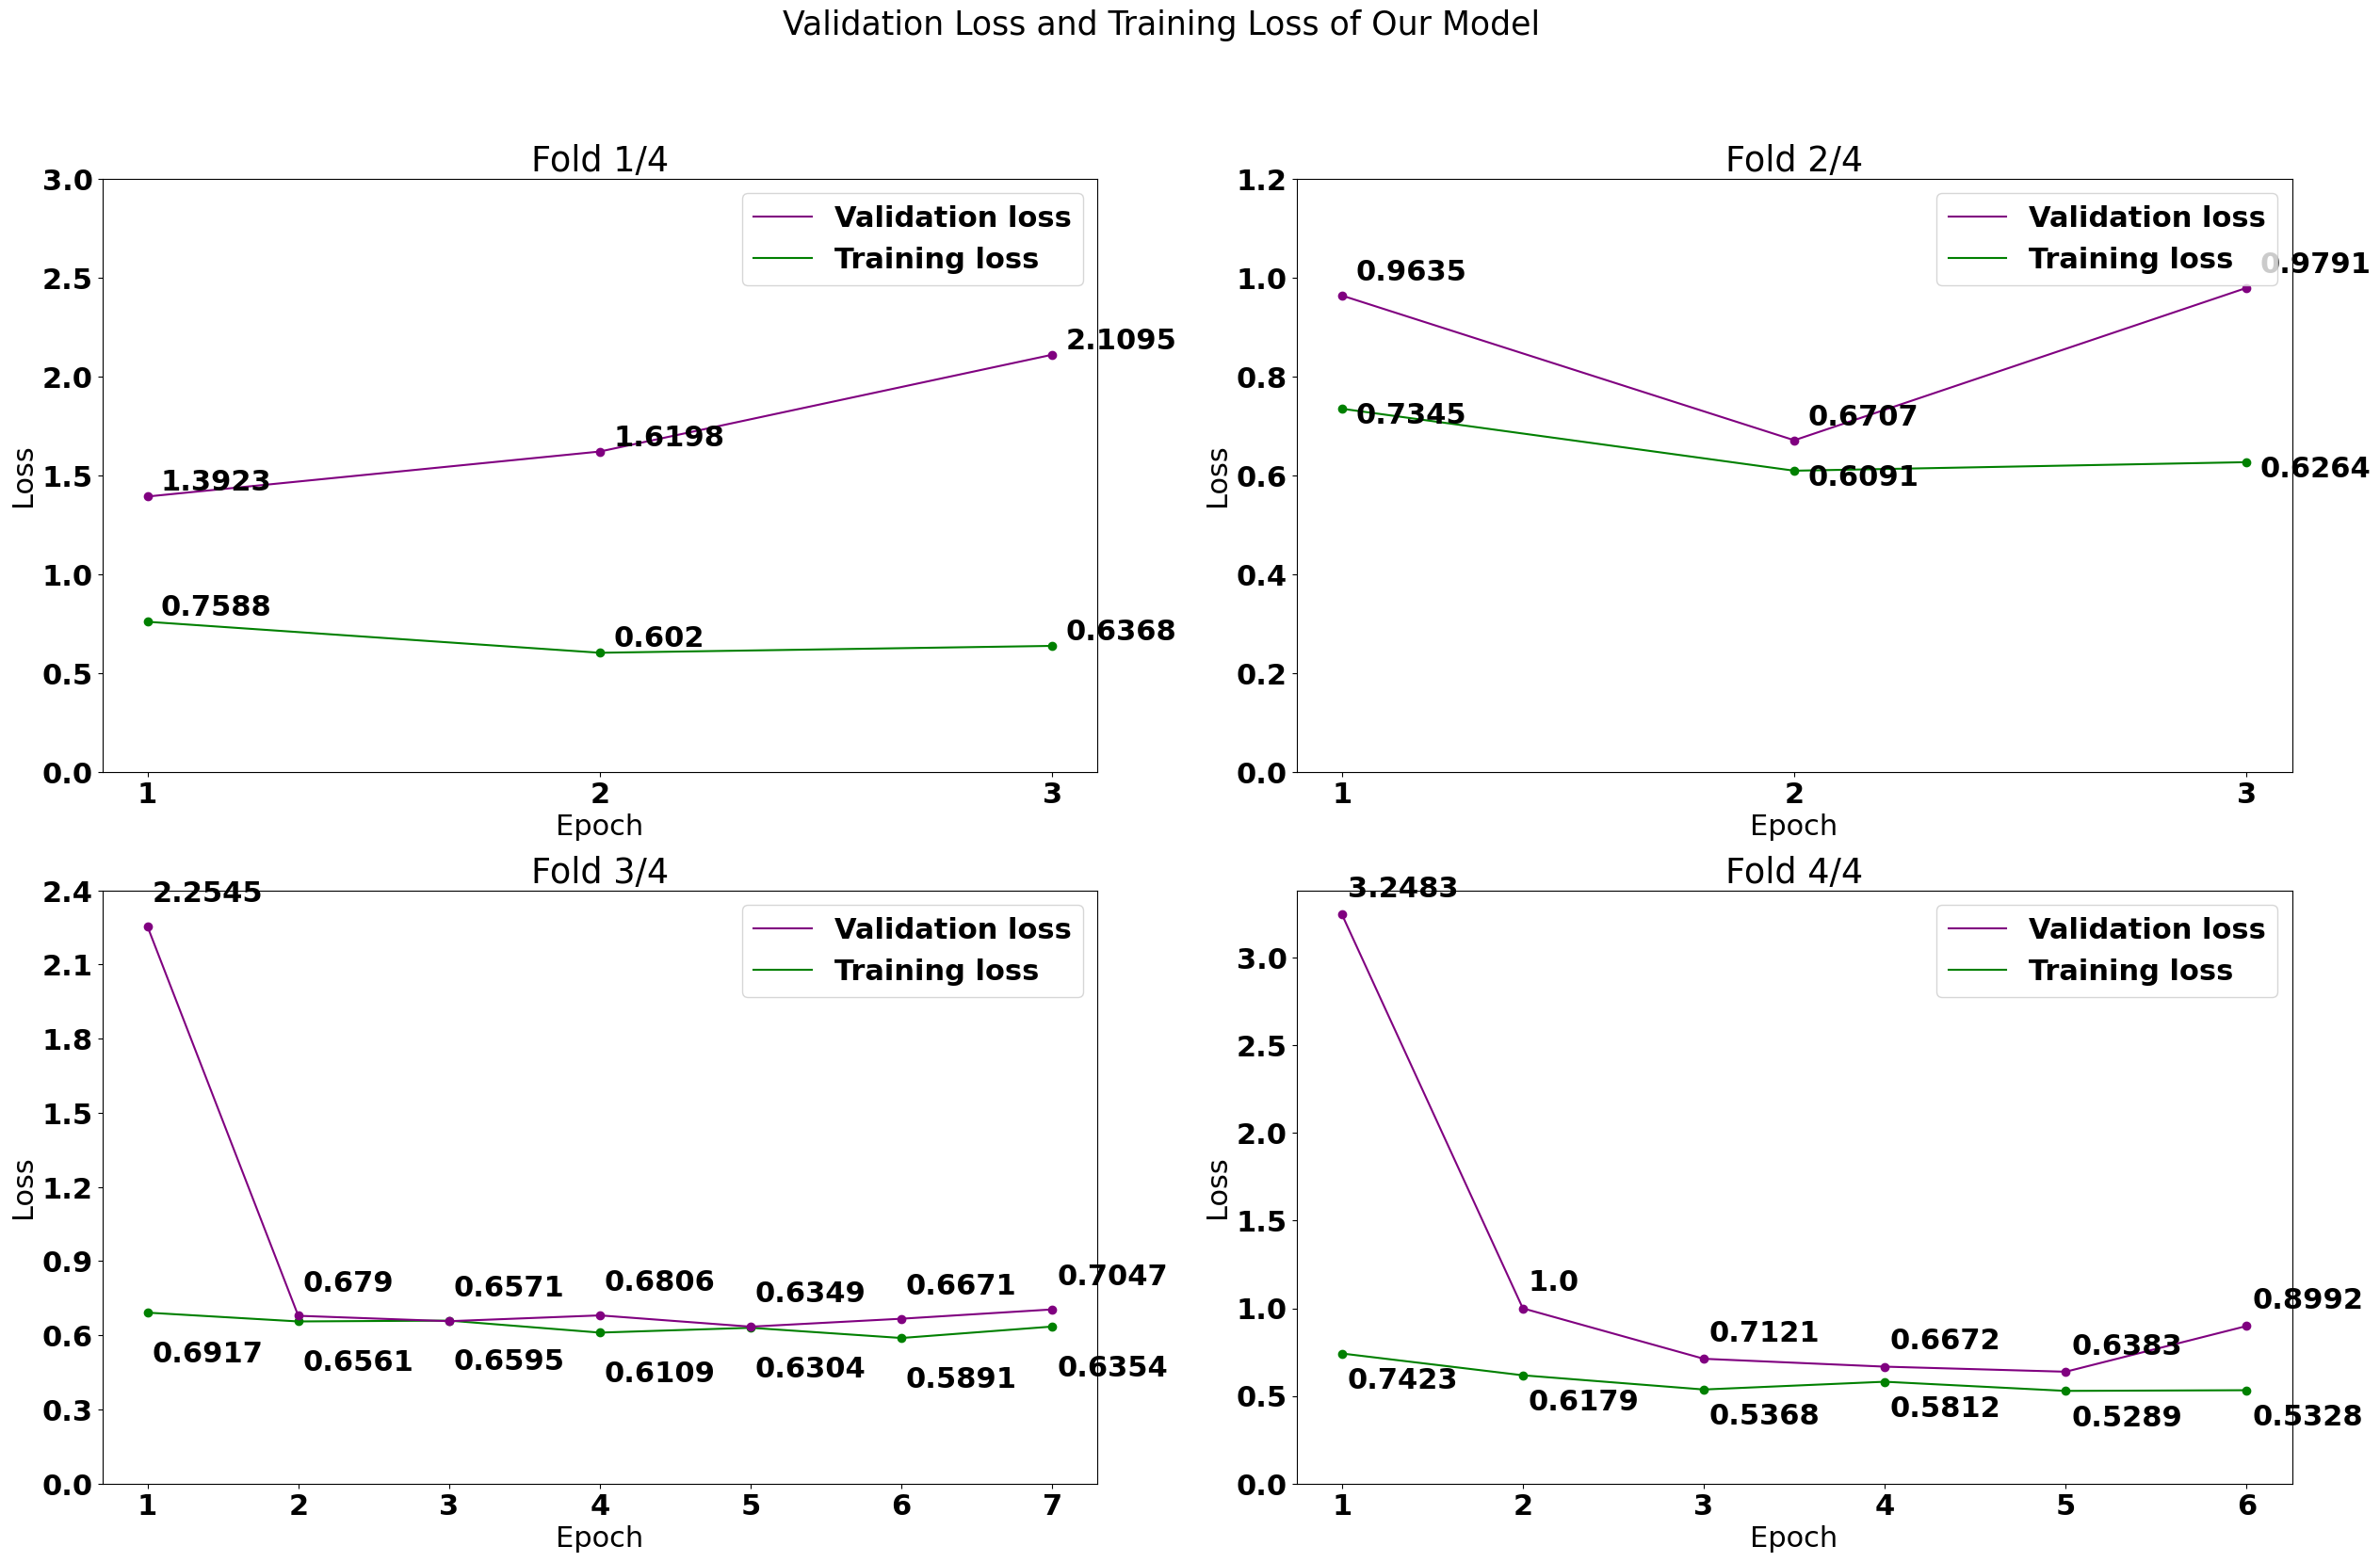

In [ ]:
#plot loss function

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 18, forward=True)

#1
fold1_loss_line, = axs[0, 0].plot(fold1_epoch, fold1_loss, color="green")
axs[0, 0].plot(fold1_epoch, fold1_loss, "o", color="green")
for i, txt in enumerate(fold1_loss):
    axs[0, 0].annotate(txt, (fold1_epoch[i]+.03, fold1_loss[i]+.03))

fold1_val_loss_line, = axs[0, 0].plot(fold1_epoch, fold1_val_loss, color="purple")
axs[0, 0].plot(fold1_epoch, fold1_val_loss, "o", color="purple")
for i, txt in enumerate(fold1_val_loss):
    axs[0, 0].annotate(txt, (fold1_epoch[i]+.03, fold1_val_loss[i]+.03))

axs[0, 0].legend([fold1_val_loss_line, fold1_loss_line], ["Validation loss", "Training loss"])
axs[0, 0].set_yticks(np.arange(0.0, 3.1, .5), minor=False)
axs[0, 0].set_xticks(fold1_epoch, minor=False)
axs[0, 0].set_title("Fold 1/4")

#2
fold2_loss_line, = axs[0, 1].plot(fold2_epoch, fold2_loss, color="green")
axs[0, 1].plot(fold2_epoch, fold2_loss, "o", color="green")
for i, txt in enumerate(fold2_loss):
    axs[0, 1].annotate(txt, (fold2_epoch[i]+.03, fold2_loss[i]-.03))

fold2_val_loss_line, = axs[0, 1].plot(fold2_epoch, fold2_val_loss, color="purple")
axs[0, 1].plot(fold2_epoch, fold2_val_loss, "o", color="purple")
for i, txt in enumerate(fold2_val_loss):
    axs[0, 1].annotate(txt, (fold2_epoch[i]+.03, fold2_val_loss[i]+.03))

axs[0, 1].legend([fold2_val_loss_line, fold2_loss_line], ["Validation loss", "Training loss"])
axs[0, 1].set_yticks(np.arange(0.0, 1.3, .2), minor=False)
axs[0, 1].set_xticks(fold2_epoch, minor=False)
axs[0, 1].set_title("Fold 2/4")

#3
fold3_loss_line, = axs[1, 0].plot(fold3_epoch, fold3_loss, color="green")
axs[1, 0].plot(fold3_epoch, fold3_loss, "o", color="green")
for i, txt in enumerate(fold3_loss):
    axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_loss[i]-.2))

fold3_val_loss_line, = axs[1, 0].plot(fold3_epoch, fold3_val_loss, color="purple")
axs[1, 0].plot(fold3_epoch, fold3_val_loss, "o", color="purple")
for i, txt in enumerate(fold3_val_loss):
    axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_val_loss[i]+.1))

axs[1, 0].legend([fold3_val_loss_line, fold3_loss_line], ["Validation loss", "Training loss"])
axs[1, 0].set_yticks(np.arange(0.0, 2.5, .3), minor=False)
axs[1, 0].set_xticks(fold3_epoch, minor=False)
axs[1, 0].set_title("Fold 3/4")

#4
fold4_loss_line, = axs[1, 1].plot(fold4_epoch, fold4_loss, color="green")
axs[1, 1].plot(fold4_epoch, fold4_loss, "o", color="green")
for i, txt in enumerate(fold4_loss):
    axs[1, 1].annotate(txt, (fold4_epoch[i]+.03, fold4_loss[i]-.2))

fold4_val_loss_line, = axs[1, 1].plot(fold4_epoch, fold4_val_loss, color="purple")
axs[1, 1].plot(fold4_epoch, fold4_val_loss, "o", color="purple")
for i, txt in enumerate(fold4_val_loss):
    axs[1, 1].annotate(txt, (fold4_epoch[i]+.03, fold4_val_loss[i]+.1))

axs[1, 1].legend([fold4_val_loss_line, fold4_loss_line], ["Validation loss", "Training loss"])
axs[1, 1].set_yticks(np.arange(0.0, 3.1, .5), minor=False)
axs[1, 1].set_xticks(fold4_epoch, minor=False)
axs[1, 1].set_title("Fold 4/4")

for ax in axs.flat:
    ax.set(xlabel="Epoch", ylabel="Loss")

fig.suptitle("Validation Loss and Training Loss of Our Model", fontsize=25)

Text(0.5, 0.98, 'Validation Accuracy and Training Accuracy of Our Model')

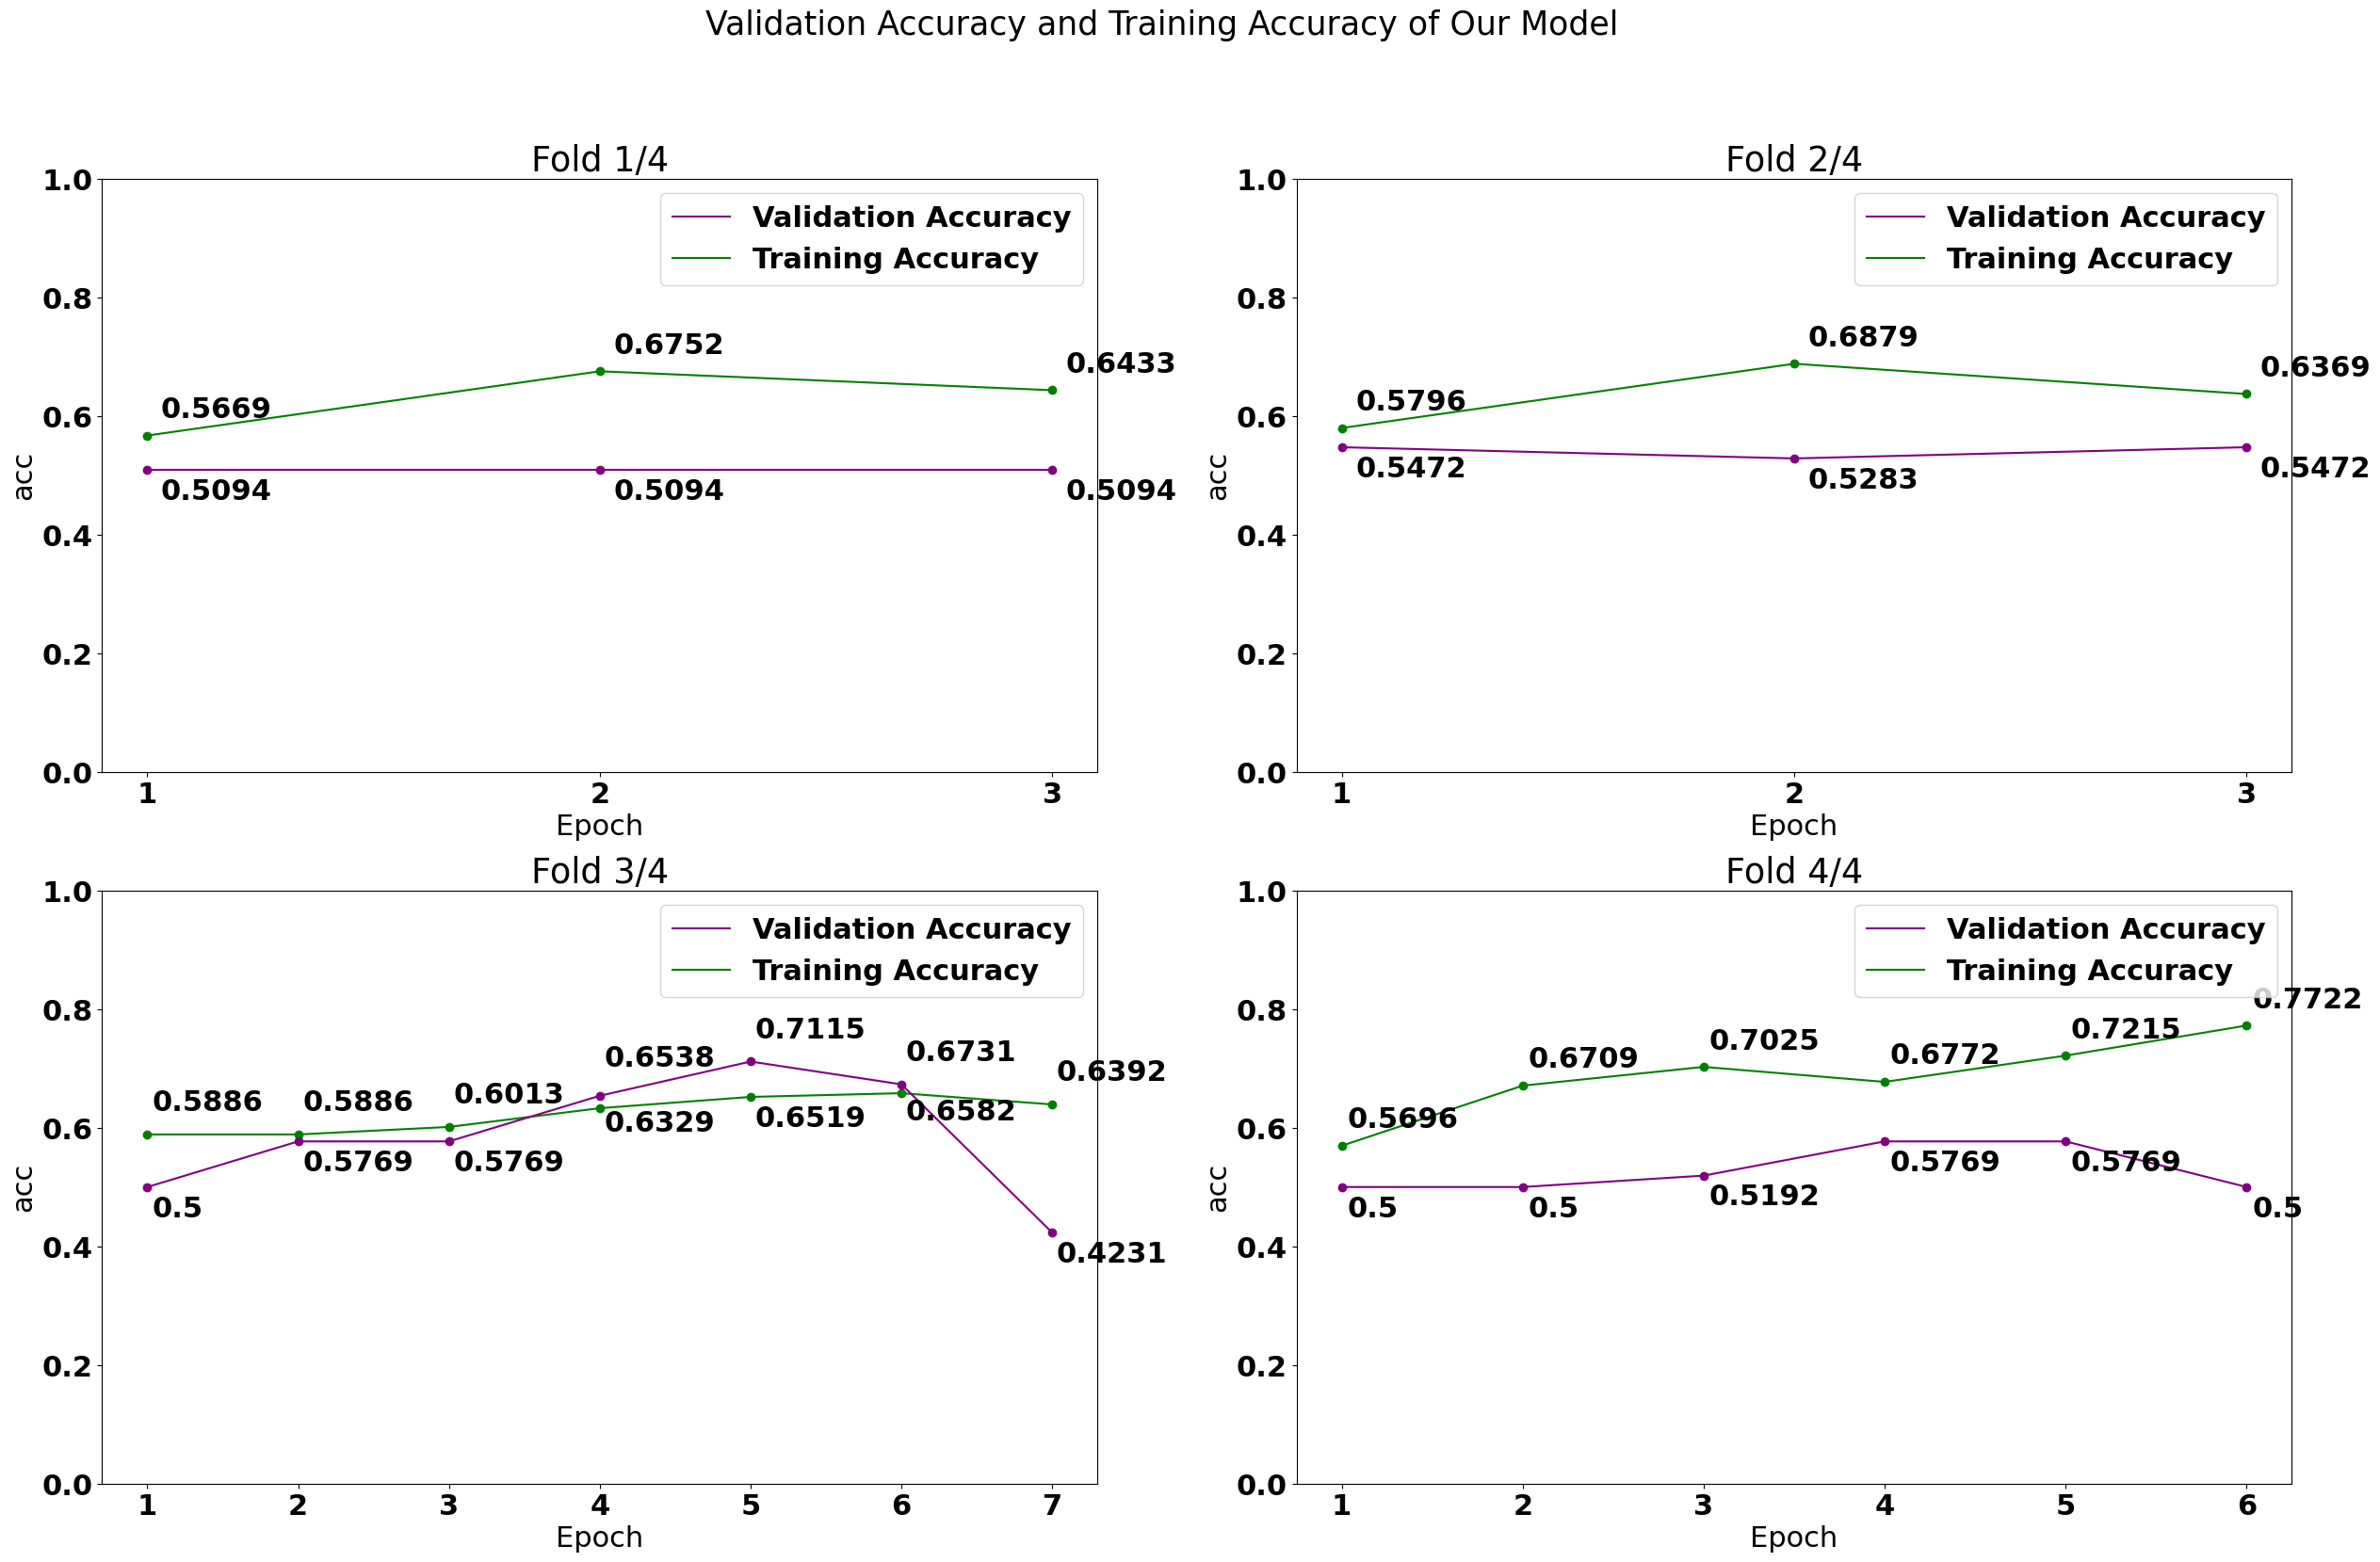

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 18, forward=True)

#1
fold1_acc_line, = axs[0, 0].plot(fold1_epoch, fold1_acc, color="green")
axs[0, 0].plot(fold1_epoch, fold1_acc, "o", color="green")
for i, txt in enumerate(fold1_acc):
    axs[0, 0].annotate(txt, (fold1_epoch[i]+.03, fold1_acc[i]+.03))

fold1_val_acc_line, = axs[0, 0].plot(fold1_epoch, fold1_val_acc, color="purple")
axs[0, 0].plot(fold1_epoch, fold1_val_acc, "o", color="purple")
for i, txt in enumerate(fold1_val_acc):
    axs[0, 0].annotate(txt, (fold1_epoch[i]+.03, fold1_val_acc[i]-.05))

axs[0, 0].legend([fold1_val_acc_line, fold1_acc_line], ["Validation Accuracy", "Training Accuracy"])
axs[0, 0].set_yticks(np.arange(0.0, 1.1, .2), minor=False)
axs[0, 0].set_xticks(fold1_epoch, minor=False)
axs[0, 0].set_title("Fold 1/4")

#2
fold2_acc_line, = axs[0, 1].plot(fold2_epoch, fold2_acc, color="green")
axs[0, 1].plot(fold2_epoch, fold2_acc, "o", color="green")
for i, txt in enumerate(fold2_acc):
    axs[0, 1].annotate(txt, (fold2_epoch[i]+.03, fold2_acc[i]+.03))

fold2_val_acc_line, = axs[0, 1].plot(fold2_epoch, fold2_val_acc, color="purple")
axs[0, 1].plot(fold2_epoch, fold2_val_acc, "o", color="purple")
for i, txt in enumerate(fold2_val_acc):
    axs[0, 1].annotate(txt, (fold2_epoch[i]+.03, fold2_val_acc[i]-.05))

axs[0, 1].legend([fold2_val_acc_line, fold2_acc_line], ["Validation Accuracy", "Training Accuracy"])
axs[0, 1].set_yticks(np.arange(0.0, 1.1, .2), minor=False)
axs[0, 1].set_xticks(fold2_epoch, minor=False)
axs[0, 1].set_title("Fold 2/4")

#3
fold3_acc_line, = axs[1, 0].plot(fold3_epoch, fold3_acc, color="green")
axs[1, 0].plot(fold3_epoch, fold3_acc, "o", color="green")
for i, txt in enumerate(fold3_acc):
    if i==3:
        axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_val_acc[i]-.06))
    elif i==4:
        axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_acc[i]-.05))
    elif i==5:
        axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_val_acc[i]-.06))
    else:
        axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_acc[i]+.04))

fold3_val_acc_line, = axs[1, 0].plot(fold3_epoch, fold3_val_acc, color="purple")
axs[1, 0].plot(fold3_epoch, fold3_val_acc, "o", color="purple")
for i, txt in enumerate(fold3_val_acc):
    if i==3:
        axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_val_acc[i]+.05))
    elif i==4:
        axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_val_acc[i]+.04))
    elif i==5:
        axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_val_acc[i]+.04))
    else:
        axs[1, 0].annotate(txt, (fold3_epoch[i]+.03, fold3_val_acc[i]-.05))

axs[1, 0].legend([fold3_val_acc_line, fold3_acc_line], ["Validation Accuracy", "Training Accuracy"])
axs[1, 0].set_yticks(np.arange(0.0, 1.1, .2), minor=False)
axs[1, 0].set_xticks(fold3_epoch, minor=False)
axs[1, 0].set_title("Fold 3/4")

#4
fold4_acc_line, = axs[1, 1].plot(fold4_epoch, fold4_acc, color="green")
axs[1, 1].plot(fold4_epoch, fold4_acc, "o", color="green")
for i, txt in enumerate(fold4_acc):
    axs[1, 1].annotate(txt, (fold4_epoch[i]+.03, fold4_acc[i]+.03))

fold4_val_acc_line, = axs[1, 1].plot(fold4_epoch, fold4_val_acc, color="purple")
axs[1, 1].plot(fold4_epoch, fold4_val_acc, "o", color="purple")
for i, txt in enumerate(fold4_val_acc):
    axs[1, 1].annotate(txt, (fold4_epoch[i]+.03, fold4_val_acc[i]-.05))

axs[1, 1].legend([fold4_val_acc_line, fold4_acc_line], ["Validation Accuracy", "Training Accuracy"])
axs[1, 1].set_yticks(np.arange(0.0, 1.1, .2), minor=False)
axs[1, 1].set_xticks(fold4_epoch, minor=False)
axs[1, 1].set_title("Fold 4/4")

for ax in axs.flat:
    ax.set(xlabel="Epoch", ylabel="acc")

fig.suptitle("Validation Accuracy and Training Accuracy of Our Model", fontsize=25)

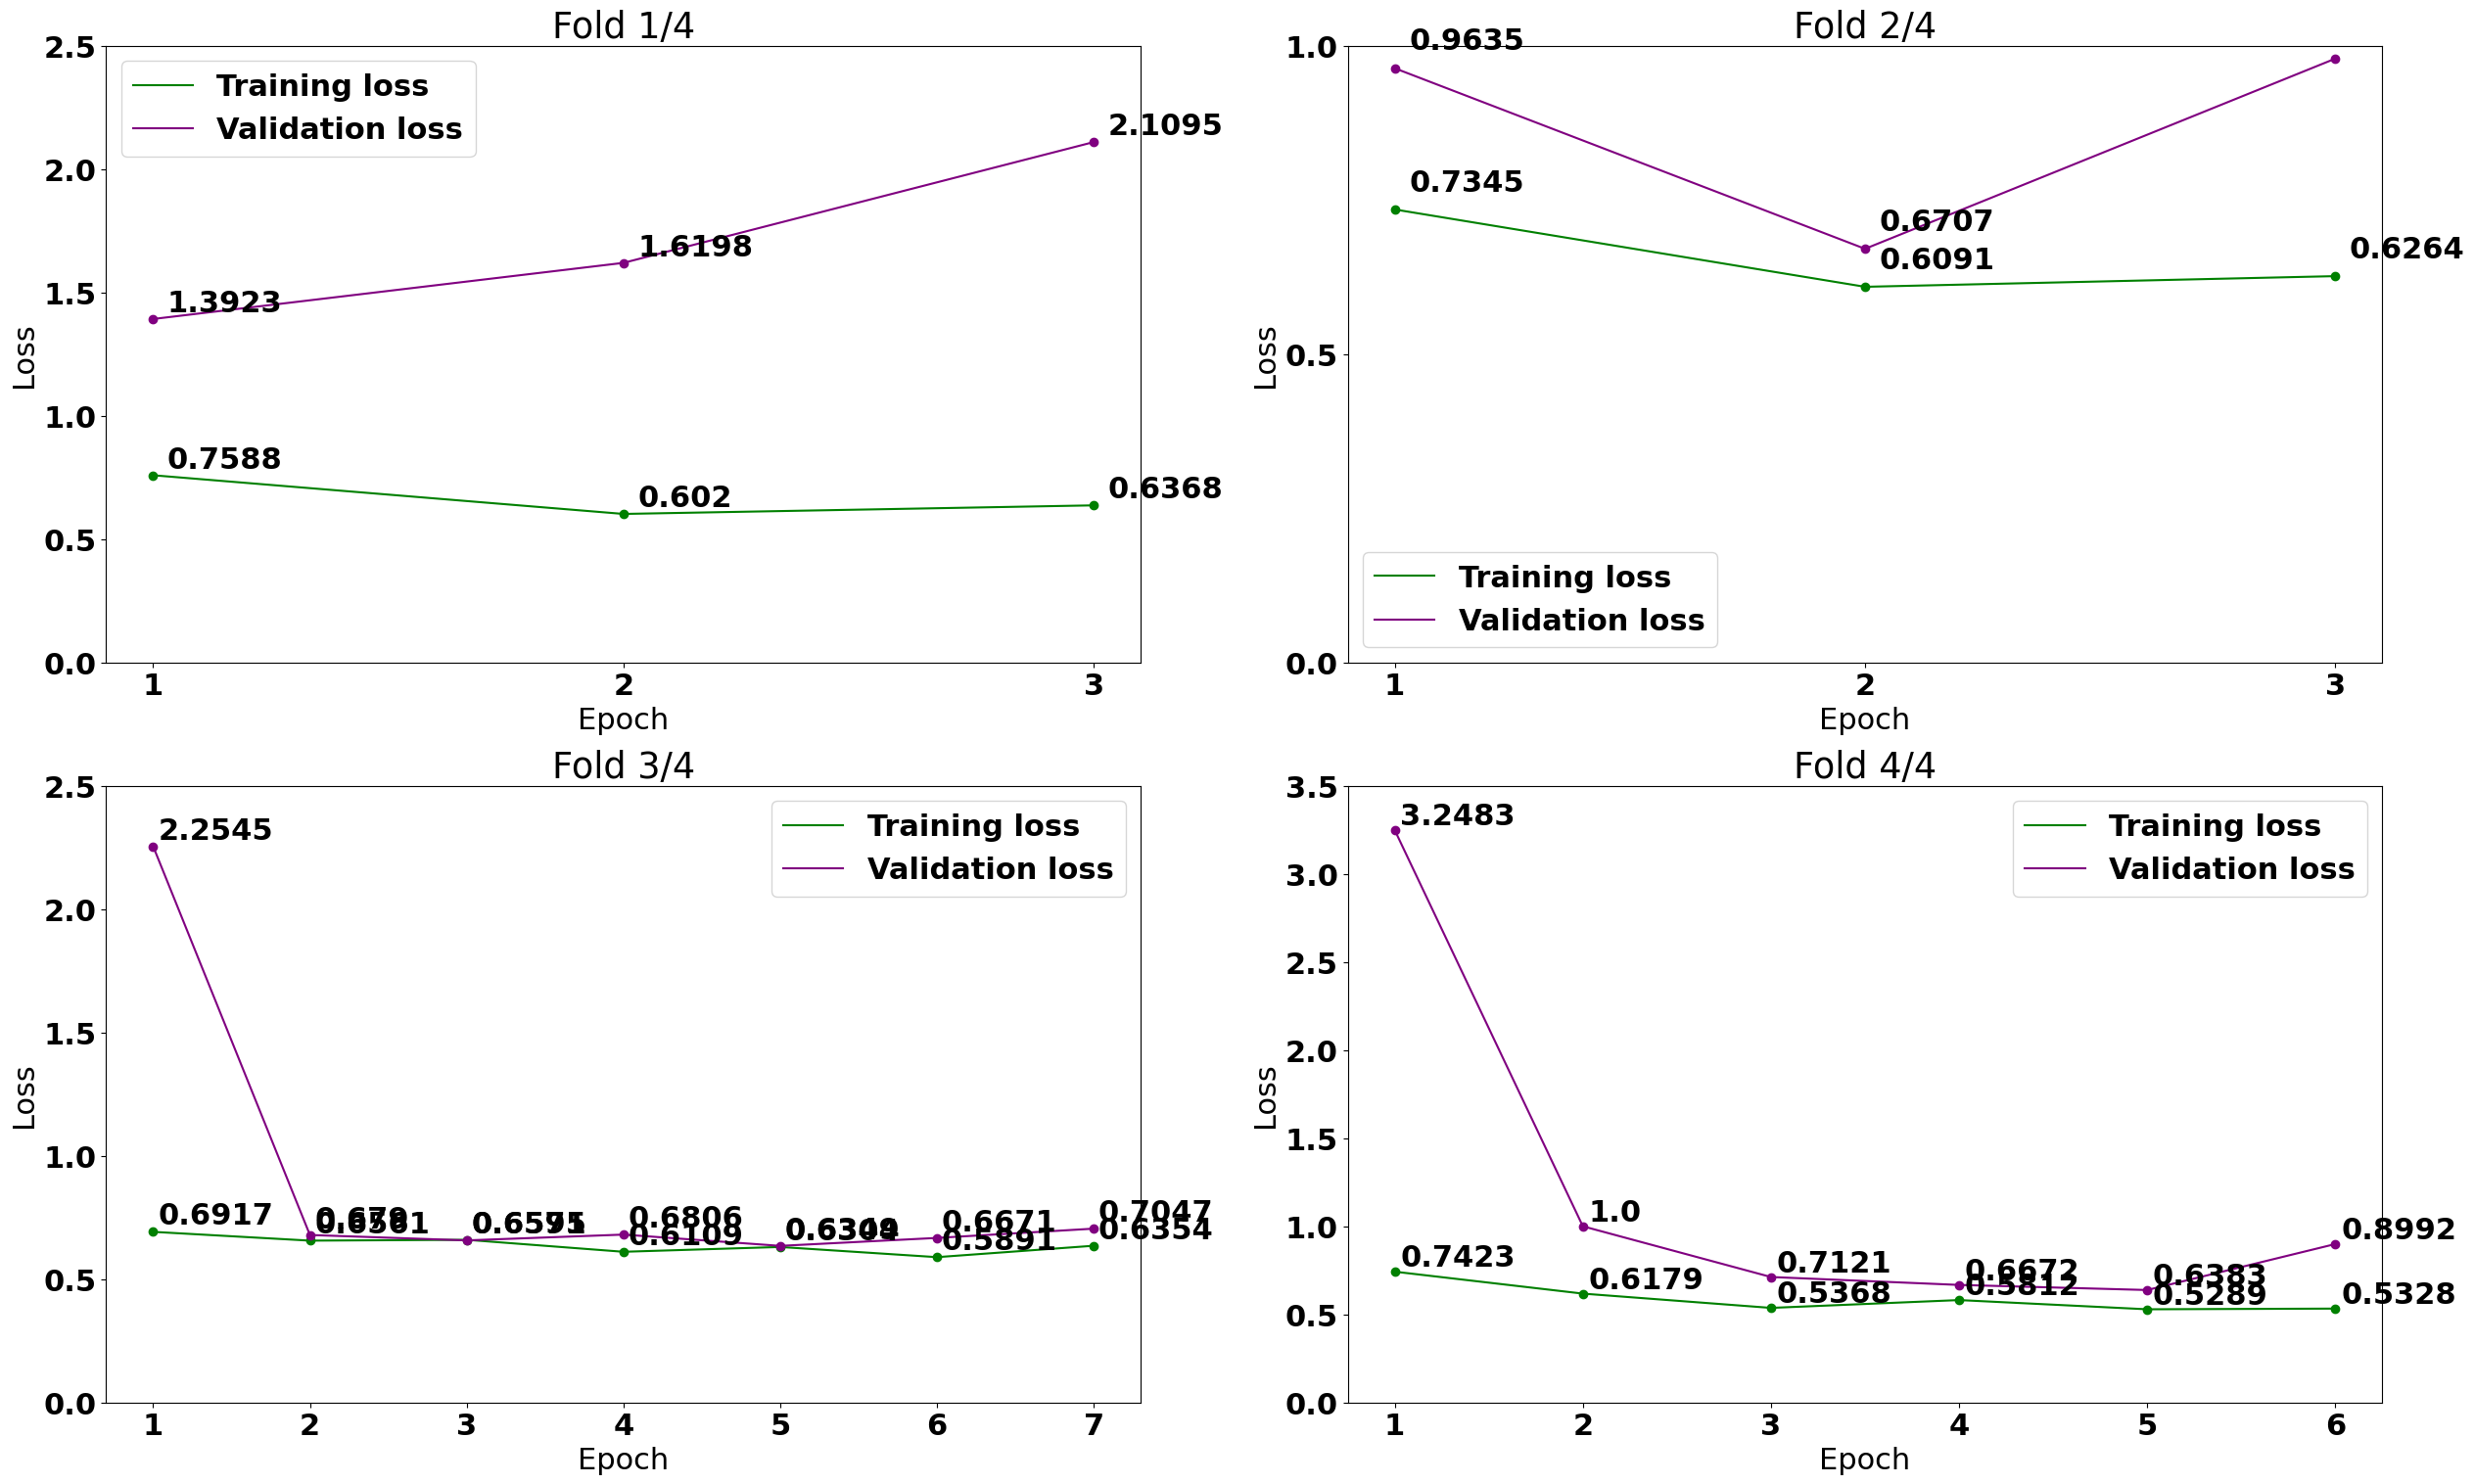

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have data for each fold: fold1_epoch, fold1_loss, fold1_val_loss, etc.

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(30, 18, forward=True)

# Define a list of folds for iteration
folds = [(fold1_epoch, fold1_loss, fold1_val_loss, "Fold 1/4"),
         (fold2_epoch, fold2_loss, fold2_val_loss, "Fold 2/4"),
         (fold3_epoch, fold3_loss, fold3_val_loss, "Fold 3/4"),
         (fold4_epoch, fold4_loss, fold4_val_loss, "Fold 4/4")]

for i, (fold_epoch, fold_loss, fold_val_loss, fold_title) in enumerate(folds):

    # Calculate the position in the grid
    row = i // 2
    col = i % 2

    # Plot training loss
    axs[row, col].plot(fold_epoch, fold_loss, color="green", label="Training loss")
    axs[row, col].plot(fold_epoch, fold_loss, "o", color="green")

    # Plot validation loss
    axs[row, col].plot(fold_epoch, fold_val_loss, color="purple", label="Validation loss")
    axs[row, col].plot(fold_epoch, fold_val_loss, "o", color="purple")

    # Add labels and legend
    for i, txt in enumerate(fold_loss):
        axs[row, col].annotate(txt, (fold_epoch[i] + .03, fold_loss[i] + .03))

    for i, txt in enumerate(fold_val_loss):
        axs[row, col].annotate(txt, (fold_epoch[i] + .03, fold_val_loss[i] + .03))

    axs[row, col].legend()

    # Set y-axis and x-axis ticks and labels
    axs[row, col].set_yticks(np.arange(0.0, max(max(fold_loss), max(fold_val_loss)) + 0.5, .5), minor=False)
    axs[row, col].set_xticks(fold_epoch, minor=False)

    # Set title
    axs[row, col].set_title(fold_title)

    # Set axis labels
    axs[row, col].set_xlabel("Epoch")
    axs[row, col].set_ylabel("Loss")

# Display the plot
plt.show()
